In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
df = pd.read_csv('../dataset/house_price.csv', encoding='utf=8')
df.head(1)

,Unnamed: 0,지역명,규모구분,연도,월,분양가격
0,0,서울,전체,2015,10,5841


In [4]:
df.drop('Unnamed: 0', 1, inplace = True)

C:\Users\user\AppData\Local\Temp/ipykernel_4660/703081412.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('Unnamed: 0', 1, inplace = True)


In [5]:
df.head()

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


## plot

kind 옵션을 어떻게 지정하느냐에 따라서 다양한 그래프를 그릴수 있다.  
시각화 목적에 맞게 kind를 잘 지정해줘서 그린다

* line 선그래프  
* bar 바그래프  
* barh 수평 바그래프  
* pie 파이그래프  
* box 박스플롯  
* kde 커널 밀도 그래프
* hist 히스토그램
* scatter 산점도 그래프
* area  면적 그래프


<AxesSubplot:>

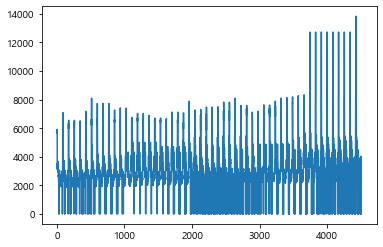

In [6]:
df['분양가격'].plot()

In [7]:
# 서울지역에 대한 집값만 본다.

In [8]:
df_s = df.loc[df['지역명'] == '서울', :]
df_s

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4420,서울,전체,2020,2,7972
4421,서울,전용면적 60㎡이하,2020,2,8193
4422,서울,전용면적 60㎡초과 85㎡이하,2020,2,8140
4423,서울,전용면적 85㎡초과 102㎡이하,2020,2,13835


In [9]:
# 서울지역 연도별 분양가
df_s_year = df_s.groupby('연도').mean()
df_s_year

,월,분양가격
연도,,
2015,11.0,6156.266667
2016,6.5,6591.950000
2017,6.5,6625.483333
2018,6.5,7030.983333
2019,6.5,8571.766667
2020,1.5,9327.200000


### line

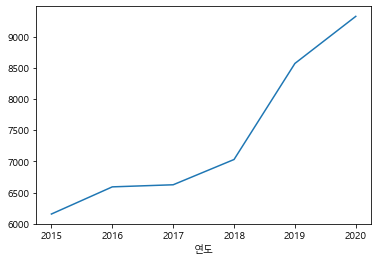

In [10]:
df_s_year['분양가격'].plot(kind = 'line')
plt.show()

In [11]:
#지역별 분양가

df.groupby('지역명').mean()[['분양가격']]

,분양가격
지역명,
강원,2339.807547
경기,4072.667925
경남,2761.275472
경북,2432.128302
광주,2450.728302
대구,3538.920755
대전,2479.135849
부산,3679.920755
서울,7225.762264


### bar

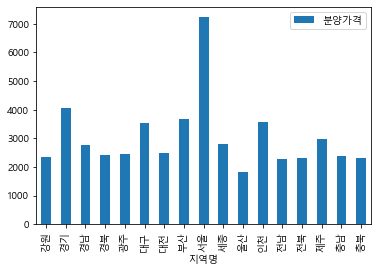

In [12]:
df.groupby('지역명').mean()[['분양가격']].plot(kind = 'bar')
plt.show()

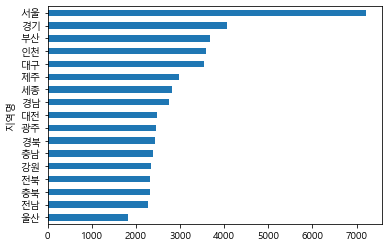

In [13]:
# df.groupby('지역명').mean()[['분양가격']].plot(kind = 'barh')
df.groupby('지역명').mean()['분양가격'].sort_values().plot(kind = 'barh')
plt.show()

### 히스토그램(hist)

값의 분포  

히스토그램은 **분양가의 분포, 빈도**를 시각화하여 보여준다  
가로축에는 분포율, 세로축에는 빈도가 시각화 되어진다

<AxesSubplot:ylabel='Frequency'>

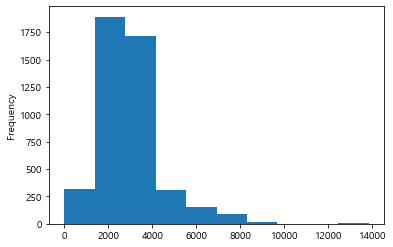

In [14]:
# 분양가의 분포를 보여준다.

df['분양가격'].plot(kind = 'hist')

#  y축은 빈도, x축은 분포

### 커널밀도 그래프

* 히스토그램과 유사하게 밀도를 보여주는 그래프
* 히스토그램과 유사한 모양을 갖추고 있다
* 부드러운 라인을 가지고 있다

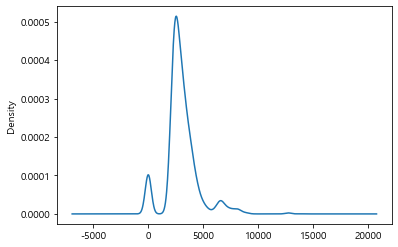

In [15]:
df['분양가격'].plot(kind = 'kde')
plt.show()

### hexbin

일명 벌집피자

* hexbin은 고밀도 산점도 그래프
* x, y값 입력 필요
* x, y값은 모두 Numeric한 값을 입력해야 함
* 데이타의 밀도를 추정

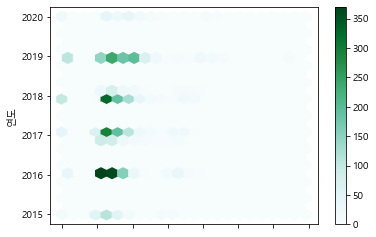

In [16]:
df.plot(kind = 'hexbin', x = '분양가격', y = '연도', gridsize = 22)
plt.show()

### Boxplot

데이타 분석가들이 가장 많이 사용하는 그래프

In [17]:
!pip install IPython 

In [18]:
from IPython.display import Image
Image(url= "https://justinsighting.com/wp-content/uploads/2016/12/boxplot-description.png")


In [19]:
df_s = df.loc[df['지역명'] == '서울', :]

<AxesSubplot:>

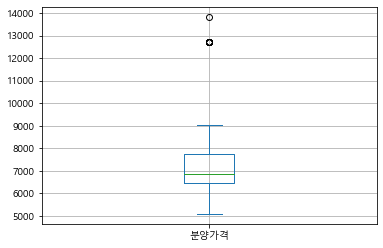

In [23]:
plt.yticks([5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000])
df_s['분양가격'].plot(kind = 'box', grid = True)

#### Pie 그래프

얼마만큼의 점유율을 가지는가를 볼수 있다

<AxesSubplot:ylabel='분양가격'>

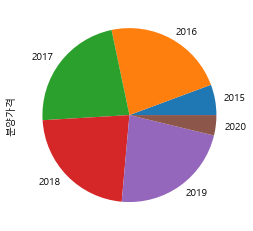

In [27]:
df.groupby('연도')['분양가격'].count().plot(kind = 'pie')

### scatter plot(산점도 그래프)

* 점으로 데이타를 표기
* x,y값이 필요함
* x,y축을 지정해주면 그에 맞는 데이타를 볼 수 있음
* Numeric한 컬럼에만 지정할수 있다.

In [28]:
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4500,제주,전체,2020,2,3955
4501,제주,전용면적 60㎡이하,2020,2,4039
4502,제주,전용면적 60㎡초과 85㎡이하,2020,2,3962
4503,제주,전용면적 85㎡초과 102㎡이하,2020,2,0


<AxesSubplot:xlabel='월', ylabel='분양가격'>

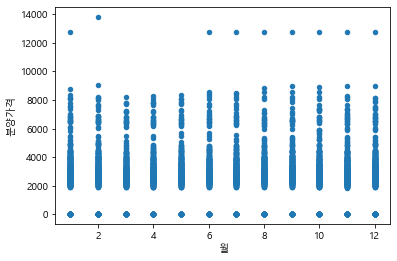

In [32]:
df.plot(kind = 'scatter', x = '월', y = '분양가격')

# 이상치를 찾을 수 있음